In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import re

In [267]:
def read_all_file_paths(list_of_files:list, start:int=None, end:int=None)->list:
  """
  Read a list of all of the file paths

  Args:
      list_of_files:List

  Returns:
      List
  """
  list_of_dfs = []
  
  if start and end:
    year_columns = [str(year) for year in range(start, end+1)]
  else:
    year_columns = [str(year) for year in range(1950, 2023)]
  
  cols_to_keep = ["country", "debt",] + year_columns
  
  for file in list_of_files:
    
    df = pd.read_csv(file + ".csv", encoding = "ISO-8859-1")
    df.fillna(0, inplace = True)
    df.columns = [re.sub(r'[^a-zA-Z0-9]', '', col) for col in df.columns]
    df.rename(columns={"countryname": "country", "indicatorname":"debt"}, inplace=True)

    if start and end:
      df.drop(columns=[col for col in df.columns if col not in cols_to_keep], inplace=True, axis=1)
    
    df['std_per_year'] = df[year_columns].std(axis=1)
    df["min_debt"] = df[year_columns].min(axis=1)
    df["max_debt"] = df[year_columns].max(axis=1)
    df["debt_grade"]  = df["std_per_year"].apply(lambda x: 0 if x<=10 else 1)
    
    list_of_dfs.append(df)
  
  return list_of_dfs

def plot_debt_graph(df:pd.DataFrame, start:int, end:int)->None:
  """
  Takes in Dataframe and displays visulization

  Args:
      df (pd.DataFrame)
  """
  year_columns = [str(year) for year in range(start, end+1)]
  # Summing debt across all countries for each year
  annual_debt = df[year_columns].sum()

  # Plotting
  plt.figure(figsize=(15, 6))
  sns.lineplot(x=annual_debt.index, y=annual_debt.values)
  plt.title(f'Total Debt from {start} to {end}')
  plt.xlabel('Year')
  plt.ylabel('Total Debt')
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.show()
  
def plot_by_country_name(country:str, df:pd.DataFrame, start:int, end:int)->None:
    """Plots country debt by name

    Args:
        country (str):
        df (pd.DataFrame):
    """
    
    year_columns = [str(year) for year in range(start, end)]

    # Set the figure size and layout
    plt.figure(figsize=(15, 6))


    country_data = df[df["country"] == country]
    plt.plot(year_columns, country_data[year_columns].values.flatten(), label=country)

    # Adding titles and labels
    plt.title(f'Debt by {country} from {start} to {end}')
    plt.xlabel('Year')
    plt.ylabel('Debt')
    plt.xticks(rotation=45)
    plt.legend()  # Add a legend if the number of countries is manageable
    plt.grid(True)
    plt.show()
      
def logistic_regression_analysis(df:pd.DataFrame)->None:
  """_summary_

  Args:
      df (_type_): _description_
  """
  X, y = df.drop(["debt_grade","country","debt"], axis=1), df["debt_grade"]
  
  
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
  
  logistic_regression = LogisticRegression()

  logistic_regression.fit(X_train, y_train)

  y_predictions = logistic_regression.predict(X_test)
  
  accuracy = accuracy_score(y_test,y_predictions)
  
  print(classification_report(y_test,y_predictions))

  print(f"The Accuracy: {accuracy}")

In [257]:
#Establish intervals
START = 2000
END = 2022

file_paths = [
  'central_government_debt', 
  "household_debt",
  "general_government_debt",
  "non-financial_corporate_debt",
  "private_debt"
  ]

centeral_government, household_debt, general_government_debt, non_financial_debt, private_debt = read_all_file_paths(file_paths,START,END)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


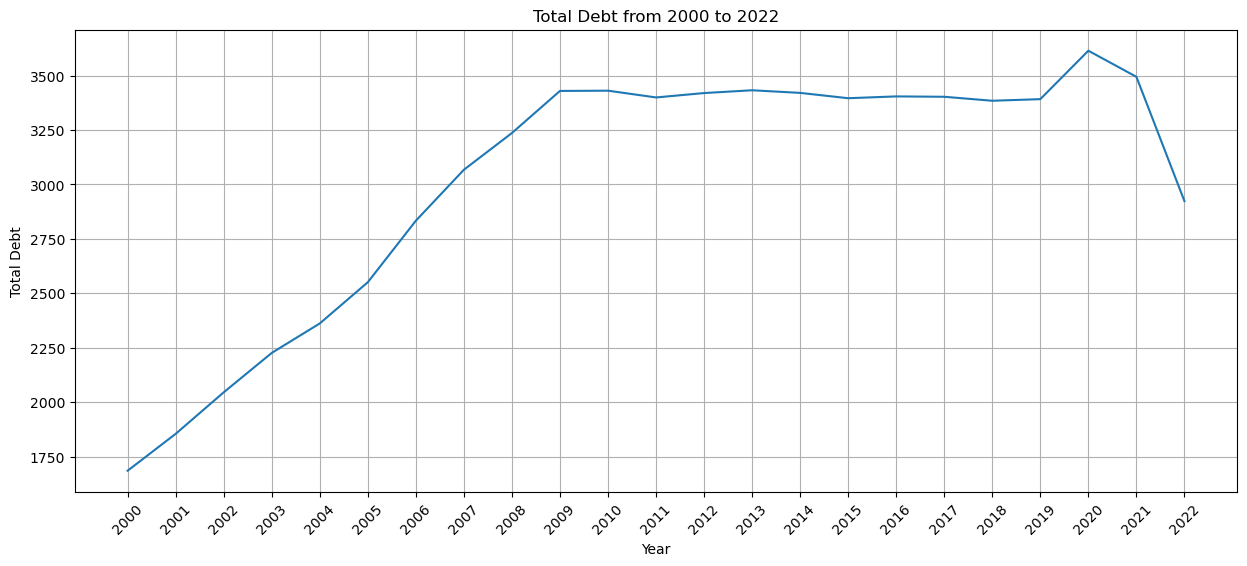

In [243]:
plot_debt_graph(household_debt, START, END)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


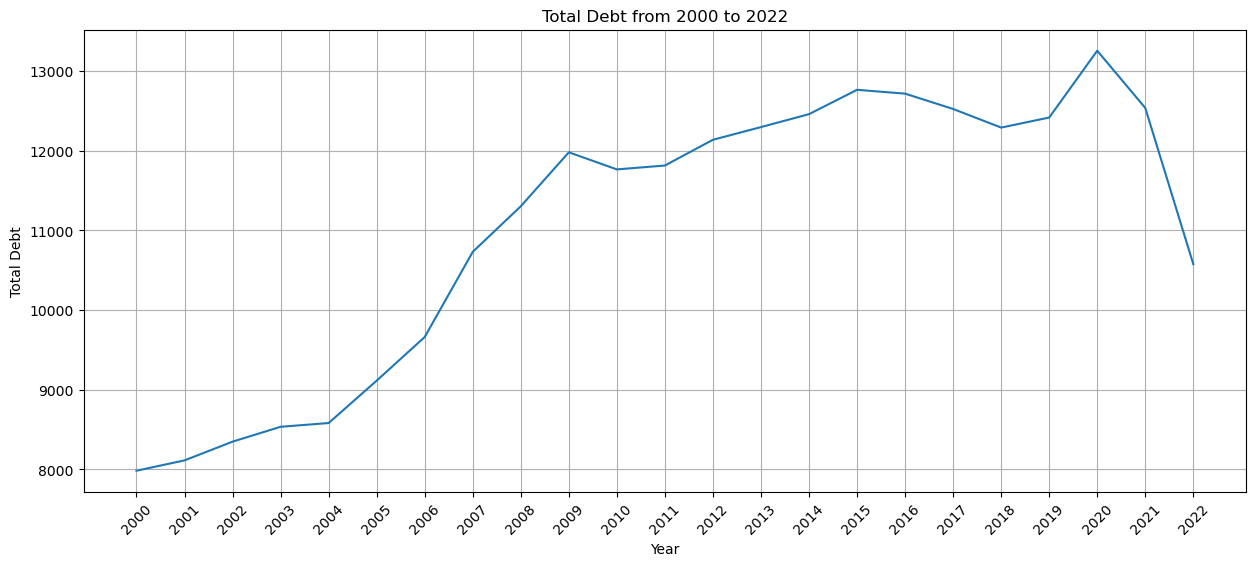

In [224]:
plot_debt_graph(private_debt, START, END)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


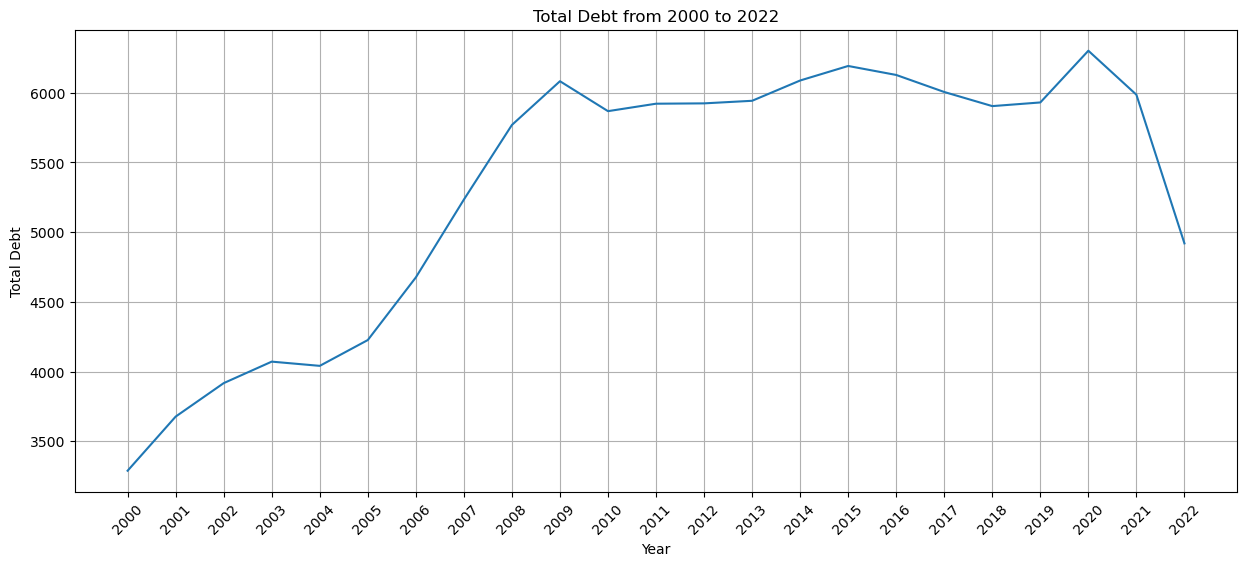

In [225]:
plot_debt_graph(non_financial_debt, START, END)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


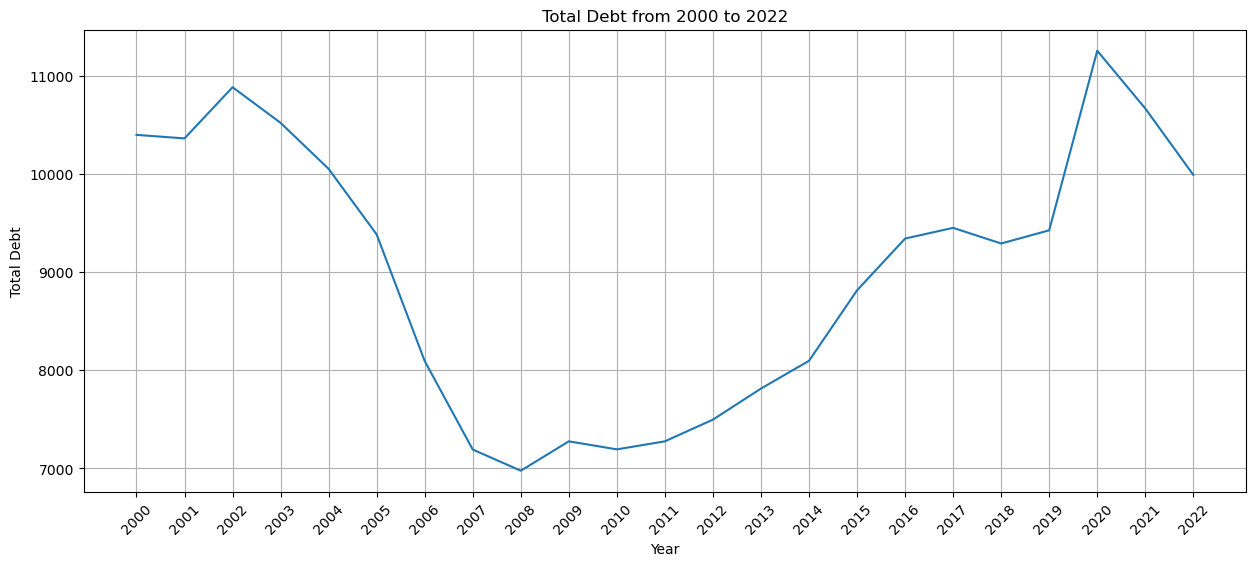

In [226]:
plot_debt_graph(centeral_government, START, END)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


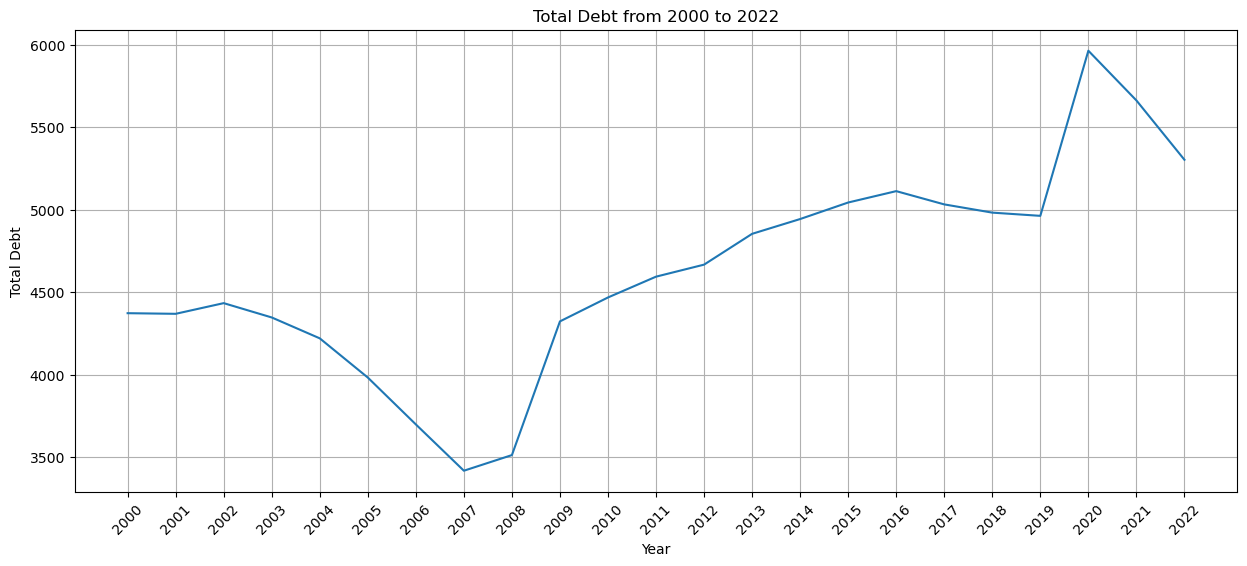

In [227]:
plot_debt_graph(general_government_debt, START, END)

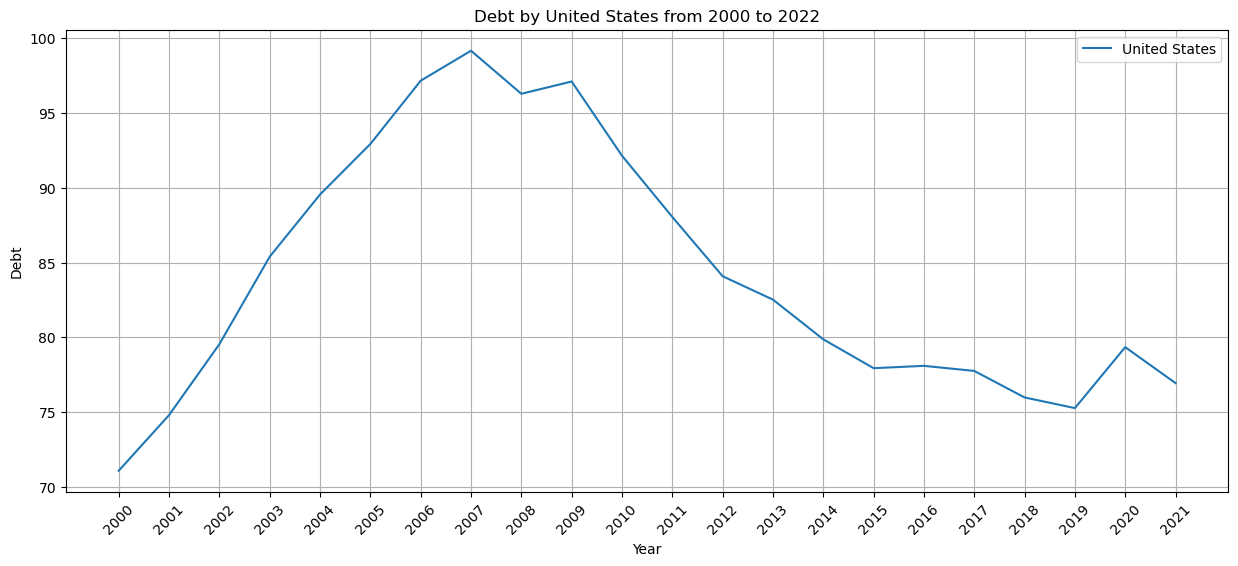

In [228]:
plot_by_country_name("United States", household_debt, START, END)

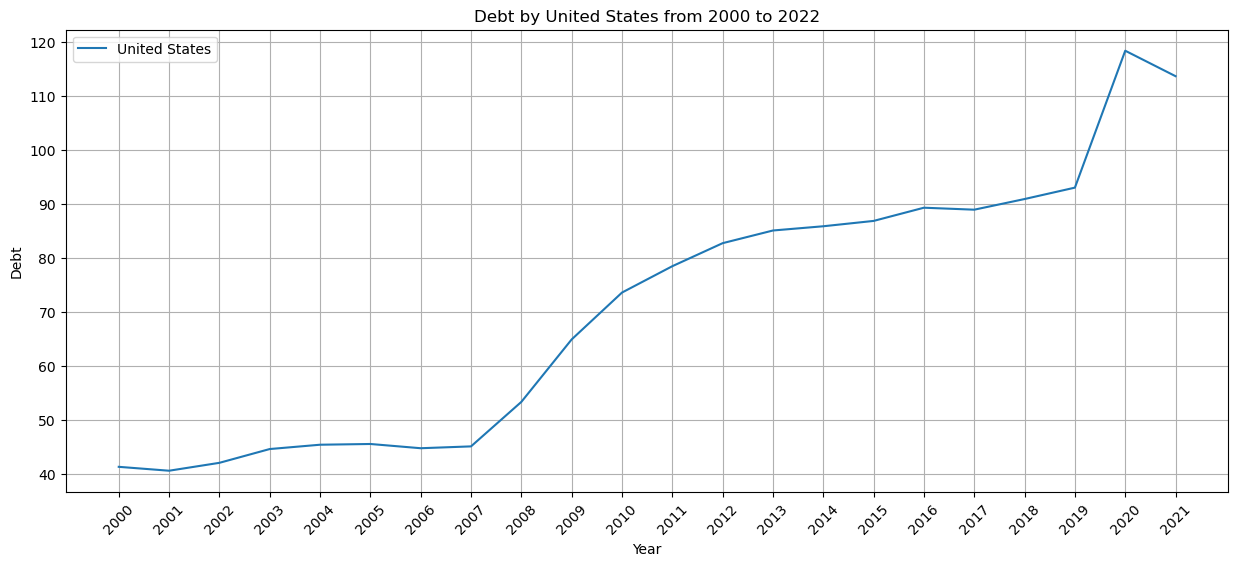

In [229]:
plot_by_country_name("United States", centeral_government, START, END)

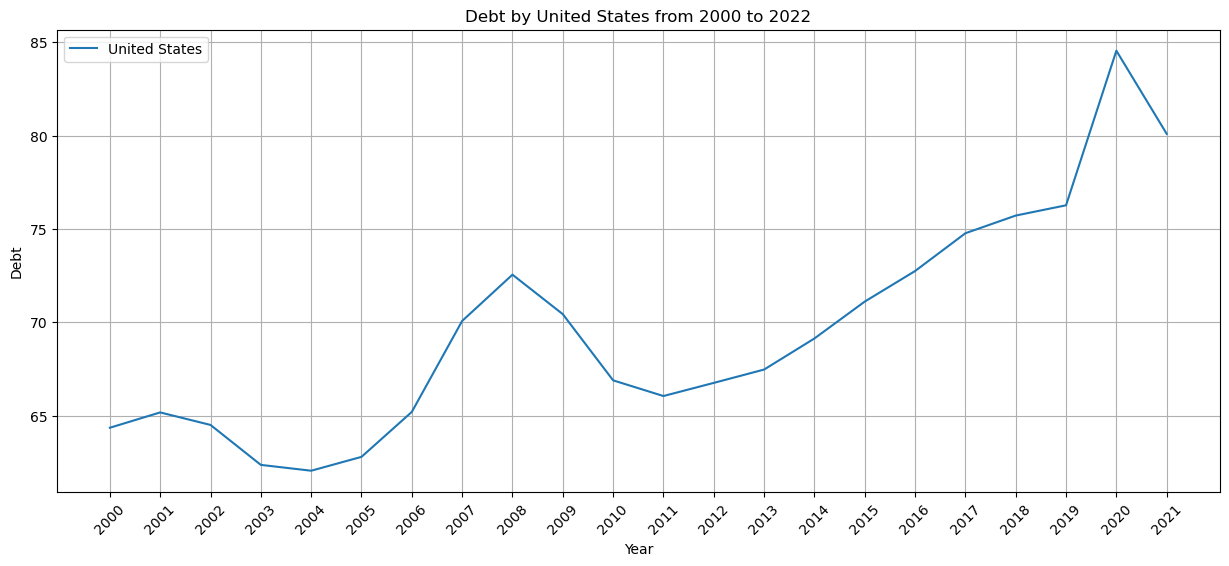

In [230]:
plot_by_country_name("United States", non_financial_debt, START, END)

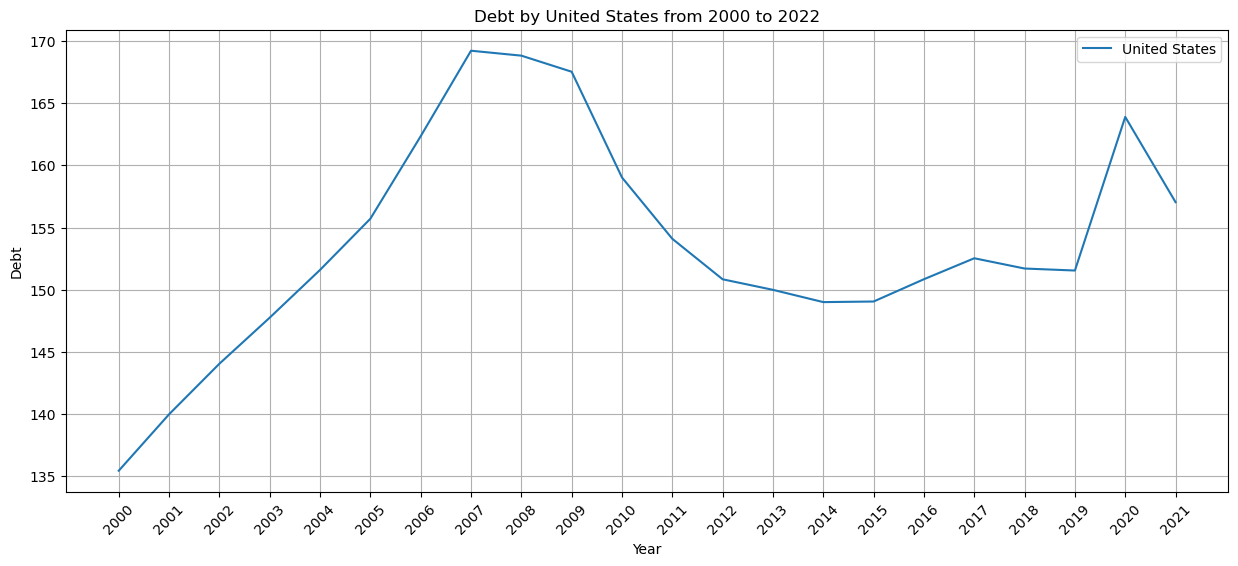

In [231]:
plot_by_country_name("United States", private_debt, START, END)

In [268]:


logistic_regression_analysis(household_debt)

              precision    recall  f1-score   support

           0       0.88      0.74      0.80        19
           1       0.50      0.71      0.59         7

    accuracy                           0.73        26
   macro avg       0.69      0.73      0.69        26
weighted avg       0.77      0.73      0.74        26

The Accuracy: 0.7307692307692307


/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [269]:
logistic_regression_analysis(private_debt)

              precision    recall  f1-score   support

           0       0.78      0.72      0.75        25
           1       0.72      0.78      0.75        23

    accuracy                           0.75        48
   macro avg       0.75      0.75      0.75        48
weighted avg       0.75      0.75      0.75        48

The Accuracy: 0.75


/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [270]:
logistic_regression_analysis(non_financial_debt)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.90      0.82      0.86        11

    accuracy                           0.88        26
   macro avg       0.89      0.88      0.88        26
weighted avg       0.89      0.88      0.88        26

The Accuracy: 0.8846153846153846


/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [271]:
logistic_regression_analysis(general_government_debt)

              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      0.84      0.91        19

    accuracy                           0.89        27
   macro avg       0.86      0.92      0.88        27
weighted avg       0.92      0.89      0.89        27

The Accuracy: 0.8888888888888888


/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [272]:
logistic_regression_analysis(centeral_government)

              precision    recall  f1-score   support

           0       0.38      0.25      0.30        12
           1       0.80      0.88      0.83        40

    accuracy                           0.73        52
   macro avg       0.59      0.56      0.57        52
weighted avg       0.70      0.73      0.71        52

The Accuracy: 0.7307692307692307


/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
